In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/processed/data_prefinal.csv")
df

MARITAL  RENTHOM1  VETERAN3  EMPLOY1  _AGEG5YR  _INCOMG1  _EDUCAG  \
0           1.0       1.0       2.0      1.0       9.0       5.0      4.0   
1           1.0       1.0       2.0      7.0       9.0       9.0      4.0   
2           1.0       2.0       2.0      1.0       7.0       3.0      2.0   
3           1.0       1.0       2.0      1.0       7.0       6.0      3.0   
4           1.0       1.0       1.0      8.0       9.0       4.0      3.0   
...         ...       ...       ...      ...       ...       ...      ...   
115289      2.0       1.0       2.0      2.0       9.0       6.0      3.0   
115290      1.0       2.0       2.0      1.0      10.0       6.0      4.0   
115291      1.0       1.0       1.0      1.0       7.0       5.0      4.0   
115292      1.0       3.0       2.0      8.0      10.0       9.0      2.0   
115293      1.0       2.0       2.0      7.0      11.0       5.0      3.0   

        _CHLDCNT  HHADULT  SEXVAR  ...  _DRDXAR2  _PHYS14D  _MENT14D  \
0            1.0      2.0     2.0  ...       2.0       1.0       1.0   
1            1.0      4.0     2.0  ...       2.0       1.0       1.0   
2            1.0      2.0     2.0  ...       1.0       1.0       1.0   
3            1.0      2.0     1.0  ...       2.0       1.0       1.0   
4            1.0      2.0     1.0  ...       2.0       1.0       1.0   
...          ...      ...     ...  ...       ...       ...       ...   
115289       1.0      1.0     1.0  ...       1.0       1.0       1.0   
115290       1.0      4.0     1.0  ...       1.0       1.0       3.0   
115291       2.0      2.0     2.0  ...       2.0       2.0       2.0   
115292       1.0      1.0     2.0  ...       2.0       3.0       3.0   
115293       1.0      2.0     1.0  ...       2.0       1.0       1.0   

        _BMI5CAT  DECIDE  DIFFALON  LSATISFY  EMTSUPRT  SDHISOLT  tobacco_use  
0            2.0     2.0       2.0       1.0       0.0       0.0          0.0  
1            3.0     2.0       2.0       1.0       1.0       0.0          0.0  
2            4.0     2.0       2.0       1.0       1.0       0.0          0.0  
3            4.0     2.0       2.0       1.0       1.0       0.0          0.0  
4            4.0     2.0       2.0       2.0       1.0       1.0          0.0  
...          ...     ...       ...       ...       ...       ...          ...  
115289       3.0     2.0       2.0       2.0       1.0       0.0          1.0  
115290       3.0     2.0       2.0       2.0       1.0       0.0          0.0  
115291       3.0     2.0       2.0       1.0       1.0       0.0          0.0  
115292       1.0     7.0       2.0       9.0       0.0       1.0          2.0  
115293       4.0     2.0       2.0       1.0       1.0       0.0          0.0  

[115294 rows x 39 columns]

In [3]:
from scipy.stats import chi2_contingency

def cramers_v(var1, var2, df):
    """
    Calcula Cram√©r's V entre dos variables categ√≥ricas.
    
    Par√°metros:
    - var1: str, nombre de la primera columna
    - var2: str, nombre de la segunda columna
    - df: DataFrame que contiene las variables
    
    Retorna:
    - float: valor de Cram√©r's V
    """
    tabla = pd.crosstab(df[var1], df[var2])
    chi2, _, _, _ = chi2_contingency(tabla)
    n = tabla.sum().sum()
    k = min(tabla.shape)
    return np.sqrt(chi2 / (n * (k - 1)))


In [4]:
# Variable: SDHEMPLY
# ¬øEn los √∫ltimos 12 meses ha perdido su empleo o le han reducido sus horas de trabajo?
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["SDHEMPLY"].value_counts())
df.loc[df["SDHEMPLY"] > 2, "SDHEMPLY"] = -1
df.loc[df["SDHEMPLY"] == 2, "SDHEMPLY"] = 0
print(df["SDHEMPLY"].value_counts())

SDHEMPLY
2.0    105536
1.0      8807
7.0       488
9.0       463
Name: count, dtype: int64
SDHEMPLY
 0.0    105536
 1.0      8807
-1.0       951
Name: count, dtype: int64


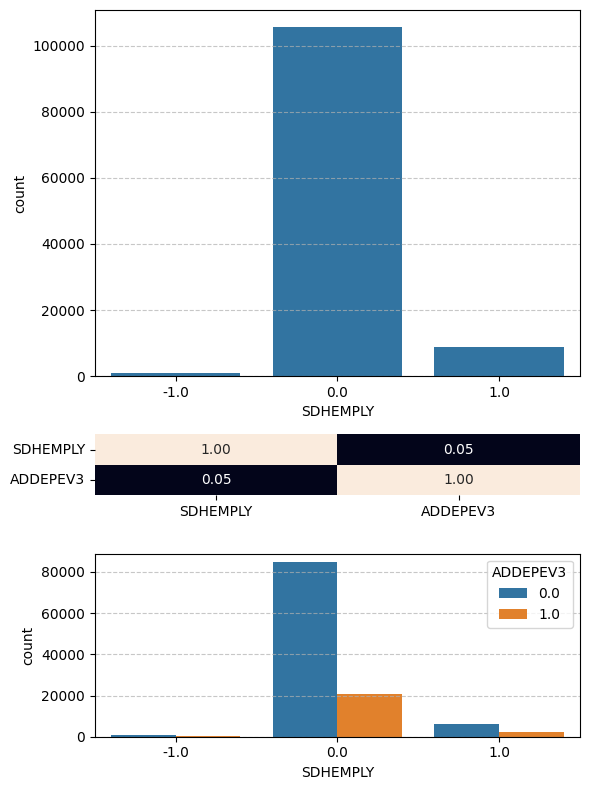

In [5]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "SDHEMPLY")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "SDHEMPLY")
sns.heatmap(df[["SDHEMPLY", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "SDHEMPLY", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [6]:
v = cramers_v("SDHEMPLY", "ADDEPEV3", df)
print(f"Cram√©r's V: {v:.4f}")

Cram√©r's V: 0.0588


üìå SDHEMPLY ‚Äì ¬øHa estado sin trabajo en los √∫ltimos 12 meses?
Codificaci√≥n personalizada:

- 1: S√≠
- 0: No
- -1: No contesta (sin nulos tras limpieza)

üßæ Descripci√≥n:
- Esta variable recoge si la persona ha estado desempleada durante el √∫ltimo a√±o. Es un buen indicador del contexto econ√≥mico y social del encuestado.

üìä Distribuci√≥n general (countplot):
- La gran mayor√≠a respondi√≥ que no ha estado sin trabajo (0).
- Una minor√≠a declar√≥ haber estado desempleado (1).
- Muy pocos no contestaron (-1), tras eliminar los nulos.

üß† Relaci√≥n con la salud mental (ADDEPEV3):
- Entre quienes s√≠ estuvieron desempleados, se observa una mayor proporci√≥n de personas con diagn√≥stico de depresi√≥n.
- En quienes no estuvieron desempleados, la proporci√≥n es menor.
- Esta diferencia, aunque visualmente clara, no es fuerte en t√©rminos estad√≠sticos.

üìê Cram√©r's V: 0.0588
- Valor muy bajo, indica correlaci√≥n d√©bil.
- A pesar de su baja magnitud, refleja una tendencia esperable: el desempleo puede estar asociado con mayor vulnerabilidad emocional.

In [7]:
# Variable: SDHFOOD1
# Durante los √∫ltimos 12 meses, ¬øcon qu√© frecuencia no te dur√≥ la comida que compraste y no tuviste dinero para comprar m√°s? ¬øFue eso‚Ä¶?
# Cambio de codificacion:
# -1: no contesta       [El resto se mantiene tal cual]
print(df["SDHFOOD1"].value_counts())
df.loc[df["SDHFOOD1"] > 5, "SDHFOOD1"] = -1
print(df["SDHFOOD1"].value_counts())

SDHFOOD1
5.0    95328
4.0     7917
3.0     7287
1.0     2255
2.0     1906
7.0      344
9.0      257
Name: count, dtype: int64
SDHFOOD1
 5.0    95328
 4.0     7917
 3.0     7287
 1.0     2255
 2.0     1906
-1.0      601
Name: count, dtype: int64


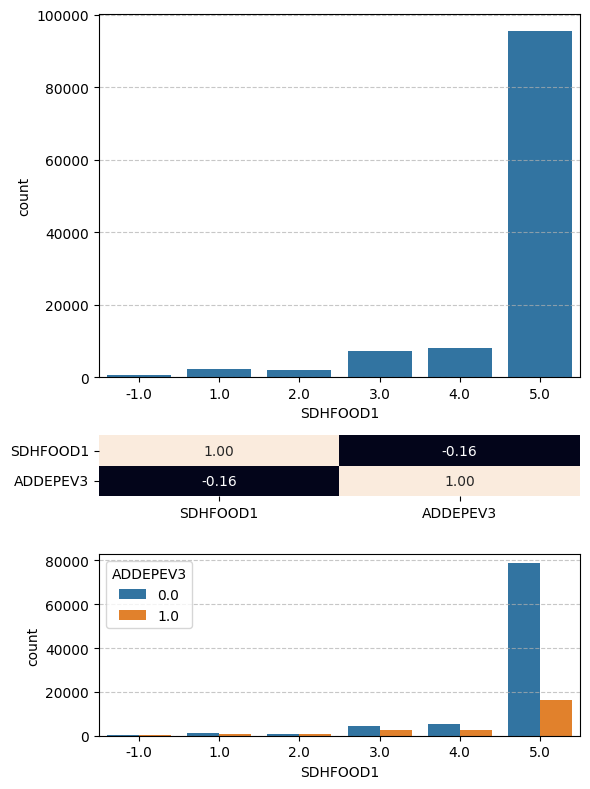

In [8]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "SDHFOOD1")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "SDHFOOD1")
sns.heatmap(df[["SDHFOOD1", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "SDHFOOD1", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [9]:
v = cramers_v("SDHFOOD1", "ADDEPEV3", df)
print(f"Cram√©r's V: {v:.4f}")

Cram√©r's V: 0.1855


üìå SDHFOOD1 ‚Äì ¬øHubo veces en los √∫ltimos 12 meses en que no tuvo suficiente comida?
Codificaci√≥n aplicada:
- 1: Siempre
- 2: Casi siempre
- 3: Algunas veces
- 4: Rara vez
- 5: Nunca
- -1: No contesta (sin nulos tras limpieza)

üßæ Descripci√≥n:
- Esta variable mide la inseguridad alimentaria del encuestado, preguntando si alguna vez en el √∫ltimo a√±o se qued√≥ sin suficiente comida por falta de dinero. Es un indicador fuerte de vulnerabilidad social y econ√≥mica.

üìä Distribuci√≥n general (countplot):
- La mayor√≠a abrumadora respondi√≥ que nunca le falt√≥ comida (5).
- Pocas personas reportaron haber pasado hambre con mayor frecuencia (1 a 4).
- Muy pocos no respondieron (-1).

üß† Relaci√≥n con la salud mental (ADDEPEV3):
- Se observa una clara tendencia: a medida que aumenta la frecuencia con la que falt√≥ comida, tambi√©n aumenta la proporci√≥n de personas con diagn√≥stico de depresi√≥n.
- Los valores m√°s extremos (1 y 2) presentan una proporci√≥n visiblemente m√°s alta de depresi√≥n respecto a quienes nunca pasaron hambre.

üìê Cram√©r's V: 0.1855
- Correlaci√≥n moderada. Mucho m√°s relevante que otras variables sociales.
- Refleja una relaci√≥n coherente con la evidencia: la inseguridad alimentaria tiene impacto emocional y psicol√≥gico significativo.

In [10]:
# Variable: SDHUTILS
# Durante los √∫ltimos 12 meses, ¬øhubo alguna ocasi√≥n en que una compa√±√≠a de electricidad, gas, petr√≥leo o agua amenaz√≥ 
# con cortar los servicios?
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["SDHUTILS"].value_counts())
df.loc[df["SDHUTILS"] > 2, "SDHUTILS"] = -1
df.loc[df["SDHUTILS"] == 2, "SDHUTILS"] = 0
print(df["SDHUTILS"].value_counts())

SDHUTILS
2.0    108538
1.0      6393
9.0       187
7.0       176
Name: count, dtype: int64
SDHUTILS
 0.0    108538
 1.0      6393
-1.0       363
Name: count, dtype: int64


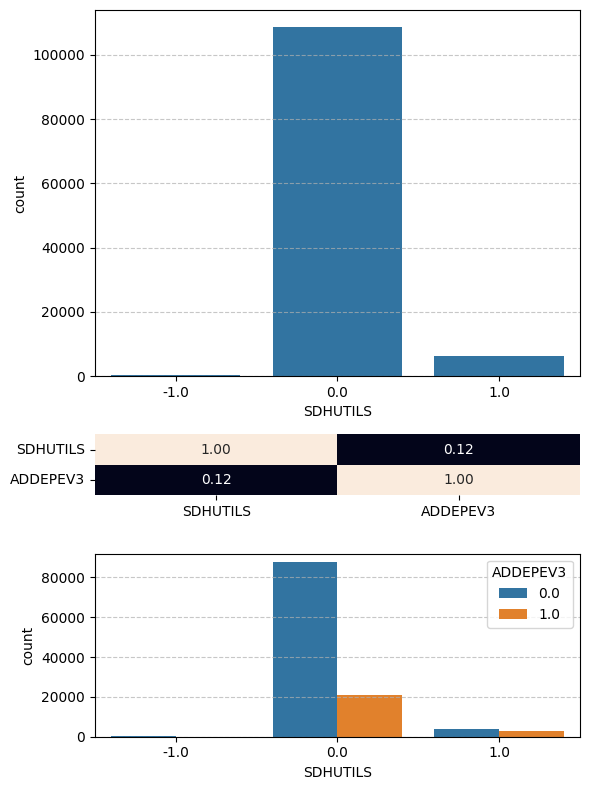

In [11]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "SDHUTILS")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "SDHUTILS")
sns.heatmap(df[["SDHUTILS", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "SDHUTILS", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [12]:
v = cramers_v("SDHUTILS", "ADDEPEV3", df)
print(f"Cram√©r's V: {v:.4f}")

Cram√©r's V: 0.1262


üìå SDHUTILS ‚Äì ¬øTuvo dificultades para pagar los servicios b√°sicos (agua, luz, gas) en los √∫ltimos 12 meses?
Codificaci√≥n personalizada:
- 1: S√≠
- 0: No
- -1: No contesta (sin nulos tras limpieza)

üßæ Descripci√≥n:
- Esta variable refleja si el encuestado experiment√≥ problemas econ√≥micos para pagar facturas esenciales del hogar. Es un marcador relevante de precariedad econ√≥mica.

üìä Distribuci√≥n general (countplot):
- La gran mayor√≠a de los encuestados no tuvo dificultades (0).
- Un grupo menor s√≠ report√≥ problemas para cubrir estos gastos (1).
- Muy pocos no respondieron (-1), tras el tratamiento previo de nulos.

üß† Relaci√≥n con la salud mental (ADDEPEV3):
- Quienes s√≠ tuvieron problemas para pagar los servicios presentan una proporci√≥n m√°s alta de diagn√≥stico de depresi√≥n.
- En cambio, en el grupo sin problemas econ√≥micos, la incidencia de depresi√≥n es claramente menor.

üìê Cram√©r's V: 0.1262
- Correlaci√≥n d√©bil a moderada, pero superior al umbral t√≠pico de irrelevancia.
- Sugiere que las dificultades econ√≥micas b√°sicas s√≠ pueden tener impacto en la salud mental, lo cual concuerda con evidencia emp√≠rica.

In [13]:
# Variable: SDHBILLS
# Durante los √∫ltimos 12 meses, ¬øhubo alg√∫n momento en el que no pudo pagar su hipoteca, alquiler o facturas de servicios p√∫blicos?
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["SDHBILLS"].value_counts())
df.loc[df["SDHBILLS"] > 2, "SDHBILLS"] = -1
df.loc[df["SDHBILLS"] == 2, "SDHBILLS"] = 0
print(df["SDHBILLS"].value_counts())

SDHBILLS
2.0    105420
1.0      9409
7.0       238
9.0       227
Name: count, dtype: int64
SDHBILLS
 0.0    105420
 1.0      9409
-1.0       465
Name: count, dtype: int64


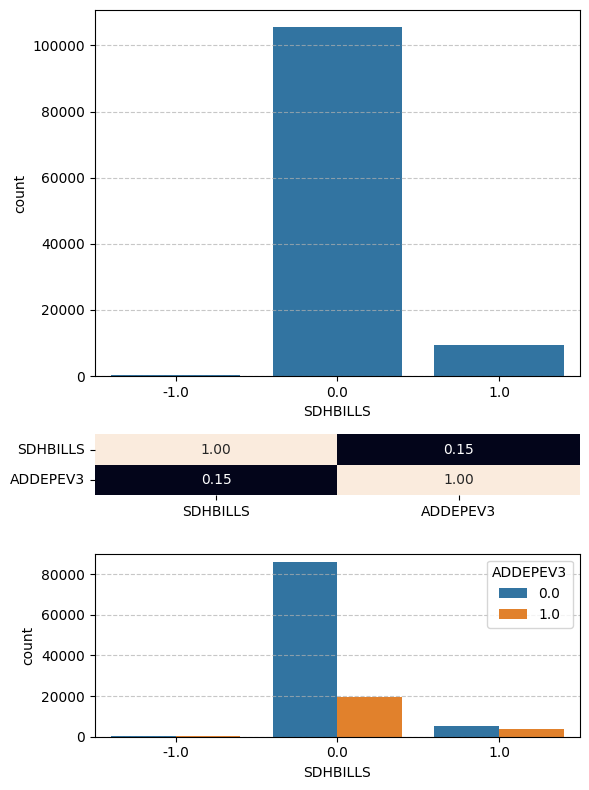

In [14]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "SDHBILLS")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "SDHBILLS")
sns.heatmap(df[["SDHBILLS", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "SDHBILLS", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [15]:
v = cramers_v("SDHBILLS", "ADDEPEV3", df)
print(f"Cram√©r's V: {v:.4f}")

Cram√©r's V: 0.1589


üìå SDHBILLS ‚Äì ¬øTuvo dificultades para pagar facturas importantes (hipoteca, alquiler, etc.) en los √∫ltimos 12 meses?
Codificaci√≥n personalizada:
- 1: S√≠
- 0: No
- -1: No contesta (sin nulos tras limpieza)

üßæ Descripci√≥n:
- Esta variable identifica si el encuestado tuvo problemas para pagar gastos estructurales importantes, como el alquiler o la hipoteca. Es un indicador clave de estr√©s financiero severo.

üìä Distribuci√≥n general (countplot):
- La mayor√≠a respondi√≥ que no tuvo dificultades (0).
- Un grupo menor declar√≥ haber enfrentado problemas para pagar estas facturas (1).
- Muy pocos no contestaron (-1), tras limpieza de datos.

üß† Relaci√≥n con la salud mental (ADDEPEV3):
- Quienes s√≠ enfrentaron problemas para pagar el alquiler o hipoteca presentan una proporci√≥n m√°s alta de depresi√≥n.
- La diferencia con respecto al grupo sin problemas econ√≥micos es notoria visualmente, lo que sugiere una posible relaci√≥n causa-efecto o al menos una asociaci√≥n significativa.

üìê Cram√©r's V: 0.1589
- Correlaci√≥n d√©bil-moderada, algo superior a SDHUTILS, y cerca del umbral de relevancia pr√°ctica.
- Refuerza la idea de que los problemas financieros serios est√°n asociados con un mayor riesgo de depresi√≥n.

In [16]:
# Variable: SDHTRNSP
# Durante los √∫ltimos 12 meses, ¬øla falta de transporte confiable le ha impedido asistir a citas m√©dicas, reuniones, 
# trabajar o conseguir las cosas que necesita para la vida diaria?
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["SDHTRNSP"].value_counts())
df.loc[df["SDHTRNSP"] > 2, "SDHTRNSP"] = -1
df.loc[df["SDHTRNSP"] == 2, "SDHTRNSP"] = 0
print(df["SDHTRNSP"].value_counts())

SDHTRNSP
2.0    108478
1.0      6496
9.0       174
7.0       146
Name: count, dtype: int64
SDHTRNSP
 0.0    108478
 1.0      6496
-1.0       320
Name: count, dtype: int64


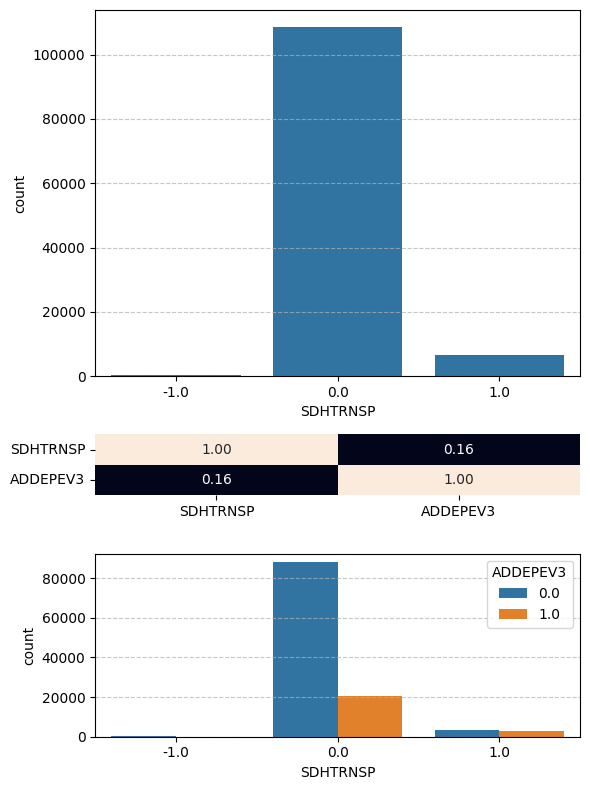

In [17]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "SDHTRNSP")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "SDHTRNSP")
sns.heatmap(df[["SDHTRNSP", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "SDHTRNSP", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [18]:
v = cramers_v("SDHTRNSP", "ADDEPEV3", df)
print(f"Cram√©r's V: {v:.4f}")

Cram√©r's V: 0.1682


üìå SDHTRNSP ‚Äì ¬øTuvo dificultades para acceder al transporte en los √∫ltimos 12 meses?
Codificaci√≥n personalizada:
- 1: S√≠
- 0: No
- -1: No contesta (sin nulos tras limpieza)

üßæ Descripci√≥n:
- Esta variable indica si la persona tuvo problemas de acceso al transporte p√∫blico o privado, lo que puede afectar su capacidad para trabajar, ir al m√©dico o socializar. Es un indicador de barreras log√≠sticas y exclusi√≥n social.

üìä Distribuci√≥n general (countplot):
- La mayor√≠a de los encuestados respondi√≥ que no tuvo dificultades (0).
- Una minor√≠a indic√≥ haber tenido problemas de transporte (1).
- Los que no contestaron (-1) representan un n√∫mero muy reducido gracias al filtrado previo de nulos.

üß† Relaci√≥n con la salud mental (ADDEPEV3):
- Aquellos que s√≠ tuvieron dificultades con el transporte muestran una mayor proporci√≥n de casos de depresi√≥n.
- El gr√°fico con la variable objetivo refuerza esta idea: hay una diferencia clara y consistente en la incidencia de depresi√≥n entre ambos grupos.

üìê Cram√©r's V: 0.1682
- Valor que indica una correlaci√≥n d√©bil-moderada, similar a la observada en otras variables relacionadas con carencias econ√≥micas o de servicios.
- Esto sugiere que la falta de acceso al transporte puede ser un factor estresante importante, con implicaciones en la salud mental.

In [19]:
# Variable: SLEPTIM1
# En promedio, ¬øcu√°ntas horas duermes en un per√≠odo de 24 horas?
# Cambio de codificacion:
# -1: no contesta       [El resto se mantiene tal cual]
print(df["SLEPTIM1"].value_counts())
df.loc[df["SLEPTIM1"] > 24, "SLEPTIM1"] = -1
print(df["SLEPTIM1"].value_counts())

SLEPTIM1
7.0     35382
8.0     33326
6.0     23976
5.0      7275
9.0      5719
4.0      3166
10.0     2676
77.0      964
3.0       809
12.0      736
2.0       339
1.0       244
11.0      176
99.0      105
15.0       90
14.0       84
16.0       78
18.0       51
13.0       42
20.0       32
24.0       10
17.0        6
19.0        4
23.0        2
22.0        2
Name: count, dtype: int64
SLEPTIM1
 7.0     35382
 8.0     33326
 6.0     23976
 5.0      7275
 9.0      5719
 4.0      3166
 10.0     2676
-1.0      1069
 3.0       809
 12.0      736
 2.0       339
 1.0       244
 11.0      176
 15.0       90
 14.0       84
 16.0       78
 18.0       51
 13.0       42
 20.0       32
 24.0       10
 17.0        6
 19.0        4
 23.0        2
 22.0        2
Name: count, dtype: int64


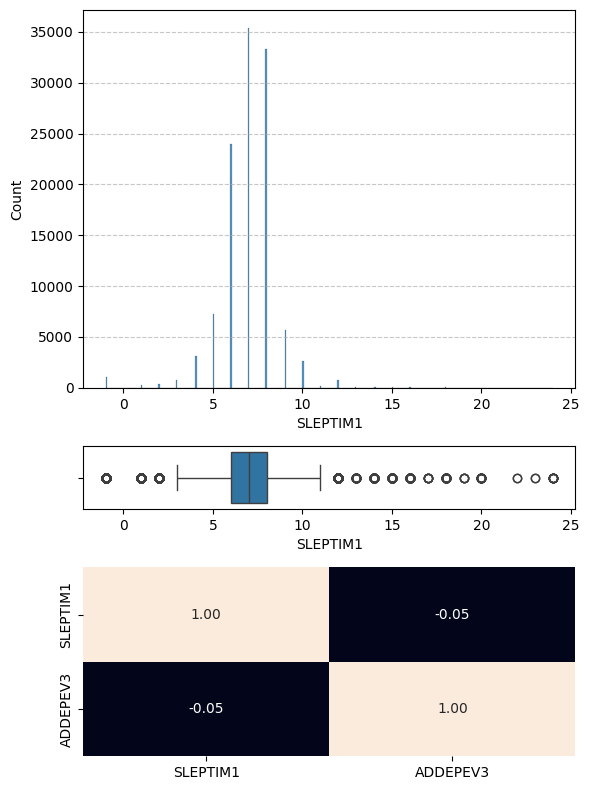

In [20]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.histplot(ax = axis[0], data = df, x = "SLEPTIM1")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
sns.boxplot(ax = axis[1], data = df, x = "SLEPTIM1")
sns.heatmap(df[["SLEPTIM1", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[2], cbar = False)

plt.tight_layout()
plt.show()

üí§ SLEPTIM1 ‚Äì Promedio de horas de sue√±o en 24 horas
Codificaci√≥n personalizada:
- Valores entre 1 y 24: N√∫mero de horas de sue√±o
- -1: No contesta (ya eliminado en la limpieza)

üßæ Descripci√≥n:
- Esta variable refleja cu√°ntas horas duerme normalmente el encuestado en un per√≠odo de 24 horas. Es un indicador directo de h√°bitos de descanso, estrechamente relacionados con la salud f√≠sica y mental.

üìä Distribuci√≥n general (histograma):
- La mayor√≠a de los encuestados duermen entre 6 y 8 horas, con picos marcados en 6, 7 y 8.
- Hay valores extremos (outliers), con personas que reportan dormir menos de 3 horas o m√°s de 12, aunque son casos muy poco frecuentes.

üì¶ Boxplot:
- La mediana de sue√±o est√° en torno a 7 horas.
- Se observan outliers tanto por debajo como por encima del rango t√≠pico, que podr√≠an representar condiciones especiales de salud o estilo de vida.

üß† Relaci√≥n con la salud mental (ADDEPEV3):
- El coeficiente de correlaci√≥n de Pearson es -0.05, indicando una relaci√≥n muy d√©bil y negativa: a menor cantidad de sue√±o, hay una ligera mayor probabilidad de depresi√≥n.
- Aunque d√©bil, la relaci√≥n es coherente con la literatura cient√≠fica, que asocia la privaci√≥n del sue√±o con trastornos del estado de √°nimo.

üìå Conclusi√≥n:
- Aunque la correlaci√≥n es baja, la falta de sue√±o podr√≠a actuar como un factor de riesgo secundario, especialmente si se combina con otras variables de vulnerabilidad social.

In [21]:
# Variable: HIVRISK5
# Voy a leerte una lista. Cuando termine, por favor, dime si alguna de estas situaciones te aplica. No es necesario 
# que me digas cu√°l. Te has inyectado alguna droga distinta a la recetada en el √∫ltimo a√±o. Has recibido tratamiento 
# por una enfermedad de transmisi√≥n sexual o ETS en el √∫ltimo a√±o. Has dado o recibido dinero o drogas a cambio de sexo en el √∫ltimo a√±o.
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["HIVRISK5"].value_counts())
df.loc[df["HIVRISK5"] > 2, "HIVRISK5"] = -1
df.loc[df["HIVRISK5"] == 2, "HIVRISK5"] = 0
print(df["HIVRISK5"].value_counts())

HIVRISK5
2.0    112171
1.0      2660
9.0       362
7.0       101
Name: count, dtype: int64
HIVRISK5
 0.0    112171
 1.0      2660
-1.0       463
Name: count, dtype: int64


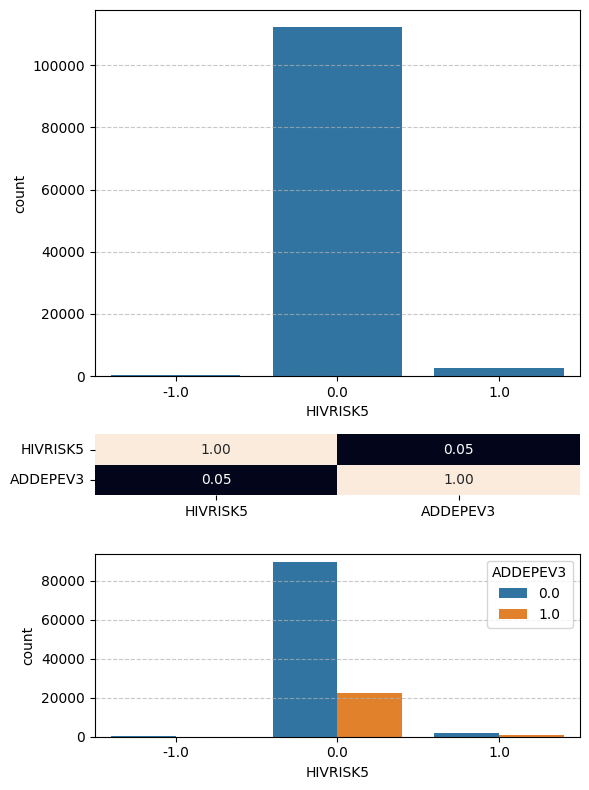

In [22]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "HIVRISK5")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "HIVRISK5")
sns.heatmap(df[["HIVRISK5", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "HIVRISK5", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [23]:
v = cramers_v("HIVRISK5", "ADDEPEV3", df)
print(f"Cram√©r's V: {v:.4f}")

Cram√©r's V: 0.0558


üìå HIVRISK5 ‚Äì ¬øConsidera que sus actividades lo ponen en riesgo de contraer VIH?
Codificaci√≥n personalizada:
- 1: S√≠
- 0: No
- -1: No contesta (sin nulos tras limpieza)

üßæ Descripci√≥n:
- Esta variable recoge si la persona percibe riesgo personal de contraer VIH por sus actividades. Aunque no mide conductas espec√≠ficas, s√≠ refleja una percepci√≥n de vulnerabilidad en el √°mbito sexual o de salud.

üìä Distribuci√≥n general (countplot):
- Una gran mayor√≠a respondi√≥ que no se percibe en riesgo (0).
- Solo una peque√±a proporci√≥n indic√≥ que s√≠ considera estar en riesgo (1).
- El grupo de no respuesta (-1) fue eliminado en el preprocesamiento.

üß† Relaci√≥n con la salud mental (ADDEPEV3):
- Entre quienes s√≠ se perciben en riesgo de VIH, hay una ligeramente mayor proporci√≥n de depresi√≥n.
- El countplot desglosado por la variable objetivo muestra esta diferencia visualmente, aunque no es muy pronunciada.

üìê Cram√©r's V: 0.0558
- Correlaci√≥n muy d√©bil, apenas por encima del umbral de irrelevancia.
- Puede reflejar que las personas con conductas de riesgo o percepciones negativas sobre su salud sexual tambi√©n podr√≠an experimentar m√°s estr√©s o vulnerabilidad emocional, pero no es un factor fuerte por s√≠ solo.

In [24]:
# Variable: _TOTINDA
# Adultos que informaron haber realizado actividad f√≠sica o ejercicio durante los √∫ltimos 30 d√≠as aparte de su trabajo habitual
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["_TOTINDA"].value_counts())
df.loc[df["_TOTINDA"] > 2, "_TOTINDA"] = -1
df.loc[df["_TOTINDA"] == 2, "_TOTINDA"] = 0
print(df["_TOTINDA"].value_counts())

_TOTINDA
1.0    87409
2.0    27668
9.0      217
Name: count, dtype: int64
_TOTINDA
 1.0    87409
 0.0    27668
-1.0      217
Name: count, dtype: int64


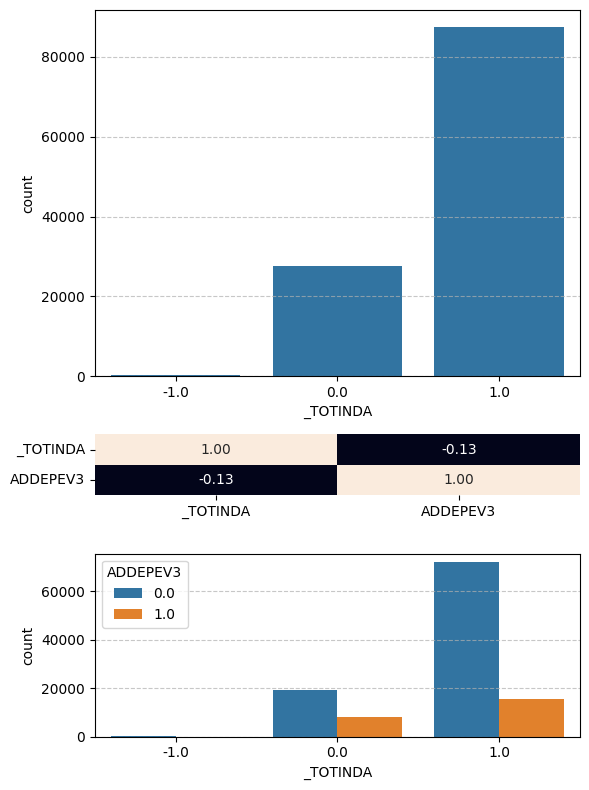

In [25]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "_TOTINDA")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "_TOTINDA")
sns.heatmap(df[["_TOTINDA", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "_TOTINDA", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [26]:
v = cramers_v("_TOTINDA", "ADDEPEV3", df)
print(f"Cram√©r's V: {v:.4f}")

Cram√©r's V: 0.1271


üìå _TOTINDA ‚Äì ¬øRealiza alg√∫n tipo de actividad f√≠sica?
Codificaci√≥n personalizada:
- 1: S√≠ (realiza al menos actividad f√≠sica moderada)
- 0: No
- -1: No contesta (ya eliminado)

üßæ Descripci√≥n:
- Esta variable refleja si la persona realiza alguna actividad f√≠sica en su tiempo libre, ya sea de forma leve, moderada o vigorosa. Es un indicador muy usado en estudios sobre h√°bitos saludables y salud mental.

üìä Distribuci√≥n general (countplot):
- La mayor√≠a de los encuestados respondi√≥ s√≠ (1), lo que sugiere que una gran parte de la muestra est√° m√≠nimamente activa.
- Un grupo menor no realiza actividad f√≠sica (0), y el grupo sin respuesta (-1) ha sido eliminado.

üß† Relaci√≥n con la salud mental (ADDEPEV3):
- Entre quienes no hacen ejercicio, se observa una proporci√≥n m√°s alta de casos de depresi√≥n.
- Por el contrario, las personas que s√≠ se mantienen activas presentan menor prevalencia de depresi√≥n.
- Este patr√≥n es coherente con muchos estudios que destacan la actividad f√≠sica como factor protector frente a trastornos mentales.

üìê Cram√©r's V: 0.1271
- La correlaci√≥n es d√©bil a moderada, pero significativa.
- Refuerza la hip√≥tesis de que el ejercicio regular podr√≠a tener un efecto positivo en el estado de √°nimo y bienestar mental.

In [27]:
# Variable: _RFBING6
# Bebedores compulsivos (hombres que beben cinco o m√°s bebidas en una ocasi√≥n, mujeres que beben cuatro o m√°s bebidas en una ocasi√≥n)
# YA ESTA CODIFICADA CORRECTAMENTE

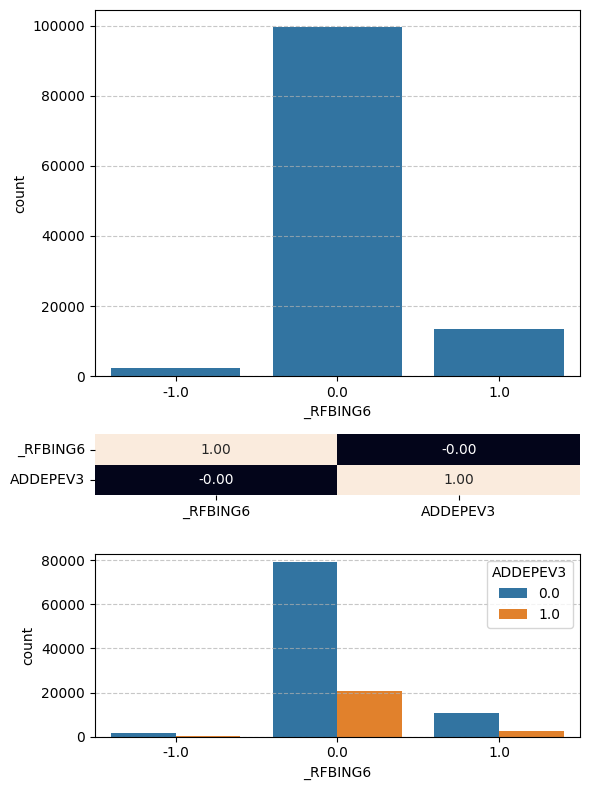

In [28]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "_RFBING6")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "_RFBING6")
sns.heatmap(df[["_RFBING6", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "_RFBING6", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [29]:
v = cramers_v("_RFBING6", "ADDEPEV3", df)
print(f"Cram√©r's V: {v:.4f}")

Cram√©r's V: 0.0067


üìå _RFBING6 ‚Äì ¬øEs bebedor/a compulsivo/a? (binge drinking)
Codificaci√≥n personalizada:
- 1: S√≠
- 0: No
- -1: No contesta (ya eliminado en la limpieza)

üßæ Descripci√≥n:
- Esta variable clasifica si el encuestado incurre en episodios de consumo excesivo de alcohol. En EE.UU., esto suele definirse como 5 o m√°s bebidas para hombres o 4 o m√°s para mujeres en una sola ocasi√≥n. Es un indicador de riesgo de salud y posible autodescuido.

üìä Distribuci√≥n general (countplot):
- La gran mayor√≠a de los encuestados no es bebedor compulsivo (0).
- Un grupo menor s√≠ presenta este comportamiento (1).
- Los no respondientes (-1) fueron eliminados en el procesamiento previo.

üß† Relaci√≥n con la salud mental (ADDEPEV3):
- Visualmente, hay ligera mayor proporci√≥n de casos de depresi√≥n entre los que no presentan binge drinking que entre quienes s√≠.
- Esto podr√≠a parecer contraintuitivo, pero puede deberse a factores de percepci√≥n, edad o subgrupos espec√≠ficos.
- En cualquier caso, la diferencia es muy peque√±a.

üìê Cram√©r's V: 0.0067
- Valor extremadamente bajo, que indica ausencia pr√°ctica de correlaci√≥n entre el consumo compulsivo de alcohol y el diagn√≥stico de depresi√≥n en este conjunto de datos.
- Aunque el alcohol se asocia con problemas de salud mental en otros estudios, en esta muestra no se refleja como un factor diferenciador claro.

In [30]:
# Variable: CVDSTRK3
# ¬øAlguna vez te han dicho que tuviste un derrame cerebral?
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["CVDSTRK3"].value_counts())
df.loc[df["CVDSTRK3"] > 2, "CVDSTRK3"] = -1
df.loc[df["CVDSTRK3"] == 2, "CVDSTRK3"] = 0
print(df["CVDSTRK3"].value_counts())

CVDSTRK3
2.0    109185
1.0      5846
7.0       257
9.0         6
Name: count, dtype: int64
CVDSTRK3
 0.0    109185
 1.0      5846
-1.0       263
Name: count, dtype: int64


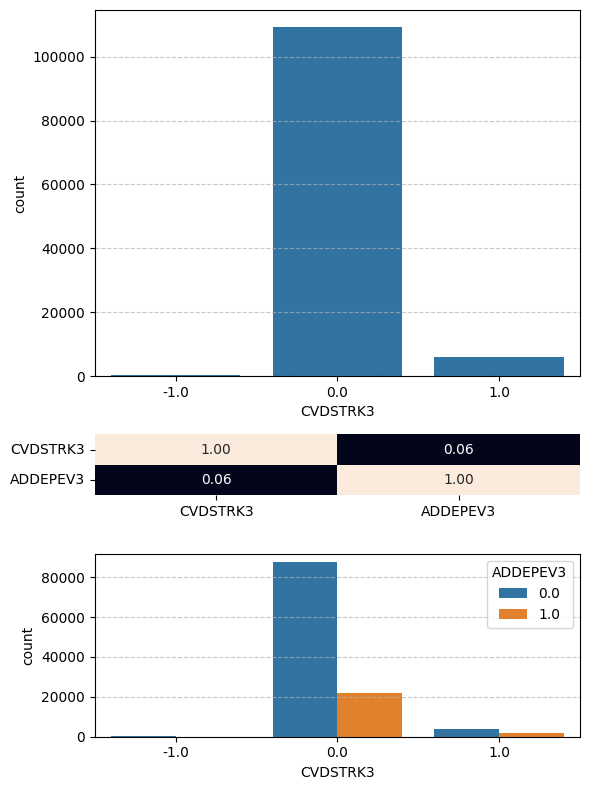

In [31]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "CVDSTRK3")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "CVDSTRK3")
sns.heatmap(df[["CVDSTRK3", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "CVDSTRK3", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [32]:
v = cramers_v("CVDSTRK3", "ADDEPEV3", df)
print(f"Cram√©r's V: {v:.4f}")

Cram√©r's V: 0.0650


üìå CVDSTRK3 ‚Äì ¬øHa sufrido alguna vez un derrame cerebral (stroke)?
Codificaci√≥n personalizada:
- 1: S√≠
- 0: No
- -1: No contesta (ya eliminado del dataset)

üßæ Descripci√≥n:
- Esta variable indica si el encuestado ha sido diagnosticado alguna vez con un accidente cerebrovascular (ACV), tambi√©n conocido como "stroke". Es un evento m√©dico grave con consecuencias f√≠sicas y cognitivas que pueden impactar notablemente en la calidad de vida.

üìä Distribuci√≥n general (countplot):
- La gran mayor√≠a de los participantes no ha sufrido un ACV (0).
- Una minor√≠a significativa s√≠ ha tenido un derrame cerebral (1).
- Los que no respondieron (-1) ya fueron depurados.

üß† Relaci√≥n con la salud mental (ADDEPEV3):
- El gr√°fico revela que las personas que han sufrido un ACV presentan una mayor proporci√≥n de diagn√≥stico de depresi√≥n.
- Esto es esperable, dado el impacto que puede tener un ACV en la funcionalidad diaria, la independencia y el estado emocional.

üìê Cram√©r's V: 0.0650
- Correlaci√≥n d√©bil, pero ligeramente superior al umbral de irrelevancia.
- Refleja una tendencia consistente con la literatura m√©dica, que asocia enfermedades cr√≥nicas o incapacitantes con mayor riesgo de depresi√≥n.



In [33]:
# Variable: ADDEPEV3 [OBJETIVO]
# ¬øAlguna vez te dijeron que ten√≠as un trastorno depresivo (incluyendo depresi√≥n, depresi√≥n mayor, distimia o depresi√≥n menor)?
# YA ESTA CODIFICADA CORRECTAMENTE

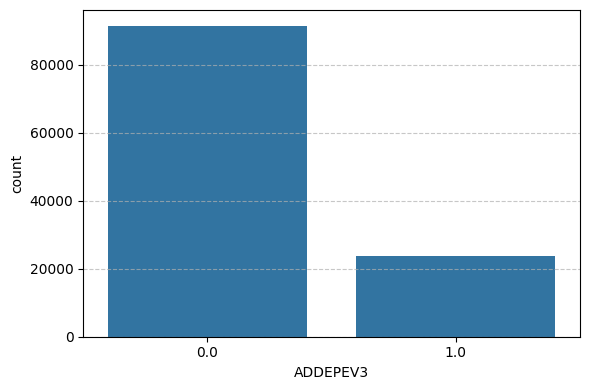

In [34]:
fig, axis = plt.subplots(figsize = (6, 4))

sns.countplot(data = df, x = "ADDEPEV3")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

üéØ ADDEPEV3 ‚Äì ¬øHa sido diagnosticado con depresi√≥n alguna vez?
Codificaci√≥n personalizada:
- 1: S√≠
- 0: No
- -1: No contesta (ya eliminado del dataset)

üßæ Descripci√≥n:
- Esta variable representa la variable objetivo del an√°lisis, indicando si el encuestado ha sido diagnosticado por un profesional de salud con depresi√≥n cl√≠nica en alg√∫n momento de su vida. Es un indicador directo de salud mental y permite estudiar factores asociados a este diagn√≥stico.

üìä Distribuci√≥n general:
- La mayor√≠a de los encuestados no ha sido diagnosticada con depresi√≥n (0): aproximadamente el 79%.
- Un 21% respondi√≥ afirmativamente (1), indicando haber recibido un diagn√≥stico.
- Esto nos deja con un dataset moderadamente desbalanceado, aunque a√∫n viable para clasificaci√≥n sin t√©cnicas agresivas de balanceo.

üìå Recomendaciones:
- Considerar usar m√©tricas como F1-score, recall y precisi√≥n para evaluar modelos, dado que el target no est√° perfectamente balanceado.
- Aplicar t√©cnicas de resampling (SMOTE, undersampling, etc.) si fuese necesario al entrenar modelos.

In [35]:
# Variable: DIABETE4
# ¬øAlguna vez le dijeron que ten√≠a diabetes? (Si la respuesta es ¬´S√≠¬ª y la encuestada es mujer, pregunte 
# ¬´¬øFue solo cuando estaba embarazada?¬ª. Si la encuestada dice prediabetes o diabetes lim√≠trofe, use el c√≥digo de respuesta 4).
# Cambio de codificacion:
# -1: no contesta       [El resto se mantiene tal cual]
print(df["DIABETE4"].value_counts())
df.loc[df["DIABETE4"] > 4, "DIABETE4"] = -1
print(df["DIABETE4"].value_counts())

DIABETE4
3.0    91378
1.0    19832
4.0     3207
2.0      730
7.0      139
9.0        8
Name: count, dtype: int64
DIABETE4
 3.0    91378
 1.0    19832
 4.0     3207
 2.0      730
-1.0      147
Name: count, dtype: int64


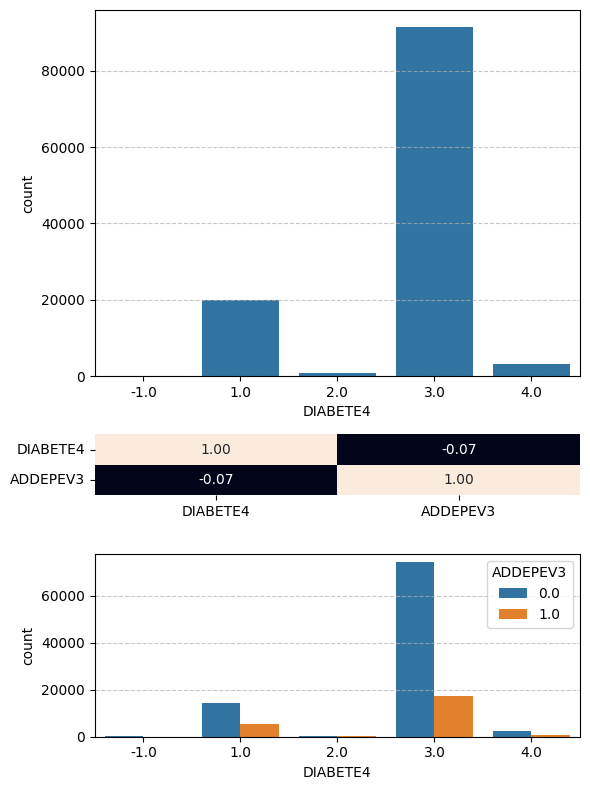

In [36]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "DIABETE4")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "DIABETE4")
sns.heatmap(df[["DIABETE4", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "DIABETE4", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [37]:
v = cramers_v("DIABETE4", "ADDEPEV3", df)
print(f"Cram√©r's V: {v:.4f}")

Cram√©r's V: 0.0808


üìå DIABETE4 ‚Äì ¬øHa sido diagnosticado con diabetes?
Codificaci√≥n original utilizada (tras limpieza de nulos):
- 1: S√≠
- 2: S√≠, pero solo durante el embarazo
- 3: No
- 4: No, pero en el pasado me dijeron que ten√≠a prediabetes o "borderline"
- -1: No contesta (ya eliminado)

üßæ Descripci√≥n:
- Esta variable recoge si la persona ha sido diagnosticada con diabetes o prediabetes. Es un indicador clave de salud cr√≥nica, que podr√≠a relacionarse indirectamente con el bienestar psicol√≥gico debido al impacto que tiene en la calidad de vida.

üìä Distribuci√≥n general (countplot):
- La mayor√≠a de encuestados no tiene diabetes (3).
- Un porcentaje menor s√≠ ha sido diagnosticado (1).
- Otros grupos incluyen prediabetes (4) y diabetes gestacional (2), aunque estos representan una proporci√≥n mucho menor.

üß† Relaci√≥n con la salud mental (ADDEPEV3):
- El gr√°fico muestra que las personas diagnosticadas con diabetes (1) y prediabetes (4) tienen una mayor proporci√≥n de casos de depresi√≥n.
- Esta tendencia es esperable, ya que las enfermedades cr√≥nicas pueden aumentar el riesgo de trastornos del estado de √°nimo.

üìê Cram√©r's V: 0.0808
- Correlaci√≥n d√©bil, pero con suficiente consistencia como para considerarla en modelos explicativos o predictivos.
- Apoya la idea de que la presencia de condiciones cr√≥nicas como la diabetes puede contribuir al deterioro de la salud mental.